In [20]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('decision_tree_data.csv')

In [3]:
df.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,1609459200000,28923.63,29031.34,28690.17,28995.13,2311.811445,1609462799999,6.676883e+07,58389,1215.359238,3.510354e+07
1,1609462800000,28995.13,29470.00,28960.35,29409.99,5403.068471,1609466399999,1.583578e+08,103896,3160.041701,9.261399e+07
2,1609466400000,29410.00,29465.26,29120.03,29194.65,2384.231560,1609469999999,6.984265e+07,57646,1203.433506,3.525275e+07
3,1609470000000,29195.25,29367.00,29150.02,29278.40,1461.345077,1609473599999,4.276078e+07,42510,775.915666,2.270555e+07
4,1609473600000,29278.41,29395.00,29029.40,29220.31,2038.046803,1609477199999,5.961464e+07,55414,1003.342834,2.934638e+07


In [38]:
# Линейная регрессия

X = df.drop(['close'], axis=1)
y = df['close']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

MAE: 85.55697829291613
MSE: 19846.36549976951
R2 score: 0.9998948408137113


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

inputs = scaler.fit_transform(df.drop(['close', 'timestamp', 'close_time'], axis=1).values)
targets = df['close'].values

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)
X_train, X_test = torch.from_numpy(X_train).float(), torch.from_numpy(X_test).float()  
y_train, y_test = torch.from_numpy(y_train).float().view(-1, 1), torch.from_numpy(y_test).float().view(-1, 1)

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(input_size, output_size))
        self.bias = nn.Parameter(torch.randn(output_size))

    def forward(self, x):
        return x @ self.weights + self.bias
    
# Инициализируем модель
input_size = X_train.shape[1]
output_size = 1
model = LinearRegression(input_size, output_size)

# Инициализируем фуункцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Запускаем обучение
num_epochs = 50000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train) # Получаем предсказания
    loss = criterion(outputs, y_train) # Обсчитываем функцию потерь

    # Выполняем оптимизацию параметров модели
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss
    if (epoch+1) % 5000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print(f'MSE модели на обучающей выборке {criterion(model(X_train), y_train)}')
print(f'MSE модели на тестовой выборке {criterion(model(X_test), y_test)}')

Epoch [5000/50000], Loss: 30516.1758
Epoch [10000/50000], Loss: 28774.8613
Epoch [15000/50000], Loss: 27312.1758
Epoch [20000/50000], Loss: 26079.8867
Epoch [25000/50000], Loss: 25038.9961
Epoch [30000/50000], Loss: 24157.7344
Epoch [35000/50000], Loss: 23410.0742
Epoch [40000/50000], Loss: 22774.6035
Epoch [45000/50000], Loss: 22233.5527
Epoch [50000/50000], Loss: 21772.2988
MSE модели на обучающей выборке 21772.21875
MSE модели на тестовой выборке 22608.68359375


In [40]:
X = df.drop(['close', 'timestamp', 'close_time'], axis=1)
y = df['close']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

MAE: 228.71802094662374
MSE: 112409.8557497386
R2 score: 0.9994043781486536


In [13]:
X = df.drop(['close'], axis=1)
y = df['close']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = GradientBoostingRegressor()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

MAE: 140.87284683910272
MSE: 43049.85207757821
R2 score: 0.999771893376932


n_e: 100
n_e: 200
n_e: 300
n_e: 400
n_e: 500
n_e: 600
n_e: 700
n_e: 800


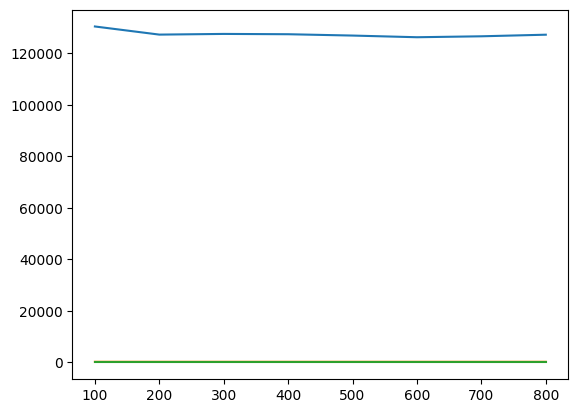

In [32]:
X = df.drop(['close'], axis=1)
y = df['close']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
estimators_history = []
mse_history = []
mae_history = []
r2_history = []

for e in range(100, 801, 100):
    model = RandomForestRegressor(n_estimators=e, 
                                  random_state=42, 
                                  max_depth=10, 
                                  min_samples_split=3, 
                                  min_samples_leaf=1,)

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    estimators_history.append(e)
    mse_history.append(mean_squared_error(y_test, y_pred))
    mae_history.append(mean_absolute_error(y_test, y_pred))
    r2_history.append(r2_score(y_test, y_pred))
    print('n_e:', e)
plt.plot(estimators_history, mse_history)

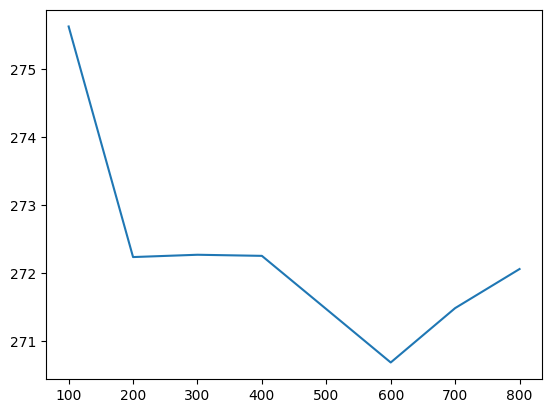

In [34]:
plt.plot(estimators_history, mae_history)

In [49]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

X = df.loc[:, 'open'].values
y = df['close']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = Sequential()

regressor.add(LSTM(units=50, 
                   return_sequences=True, 
                   input_shape=(X_train_scaled.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
              
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
              
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
              
regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train_scaled, y_train, epochs=1000, batch_size=32)

2023-05-04 19:09:01.424325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:09:01.428787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:09:01.431989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/1000


2023-05-04 19:09:04.397861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:09:04.401668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:09:04.404876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

500/500 [==============================] - 34s 38ms/step - loss: 1487708288.0000
Epoch 2/1000
500/500 [==============================] - 18s 37ms/step - loss: 1485833216.0000
Epoch 3/1000
500/500 [==============================] - 19s 37ms/step - loss: 1484031488.0000
Epoch 4/1000
500/500 [==============================] - 19s 39ms/step - loss: 1482192256.0000
Epoch 5/1000
500/500 [==============================] - 19s 39ms/step - loss: 1480337152.0000
Epoch 6/1000
500/500 [==============================] - 19s 39ms/step - loss: 1478512512.0000
Epoch 7/1000
500/500 [==============================] - 20s 40ms/step - loss: 1476687232.0000
Epoch 8/1000
500/500 [==============================] - 20s 41ms/step - loss: 1474877696.0000
Epoch 9/1000
500/500 [==============================] - 21s 41ms/step - loss: 1473071616.0000
Epoch 10/1000
500/500 [==============================] - 21s 42ms/step - loss: 1471247104.0000
Epoch 11/1000
500/500 [==============================] - 20s 41ms/step -

KeyboardInterrupt: 